In [1]:
# Import libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from ema_workbench.util import ema_logging, utilities

C:\Users\marce\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_base = pd.read_csv('results/BaseCase.csv')[['population', 'familiarity', 'evac100']]

In [3]:
def check_convergence(df, crowd, familiarity, i, j):
    df_conv = df[(df['familiarity'] == familiarity) & (df['population'] == crowd)]
    
    for index, row in df_conv.iterrows():
        df_conv.loc[index,'Average Ticks'] = df_conv.loc[:index,'evac100'].mean()
        
    df_conv.reset_index(inplace=True)
    
    return sns.lineplot(ax=axs[i][j], data=df_conv, x=df_conv.index,y='Average Ticks')

C:\Users\marce\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\marce\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\marce\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

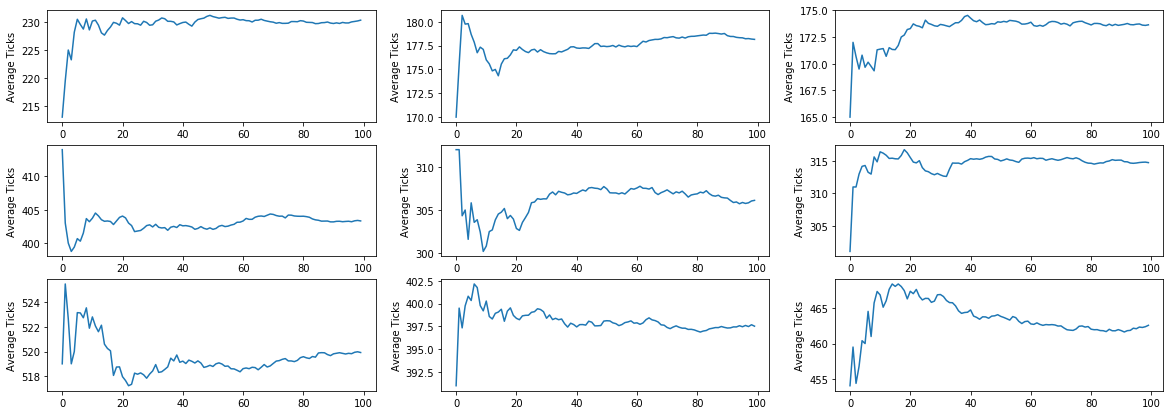

In [4]:
fig, axs = plt.subplots(3, 3, figsize=(20, 7), sharey=False)

check_convergence(df_base, 700, 0.2, 0, 0)
check_convergence(df_base, 700, 0.6, 0, 1)
check_convergence(df_base, 700, 1, 0, 2)

check_convergence(df_base, 1400, 0.2, 1, 0)
check_convergence(df_base, 1400, 0.6, 1, 1)
check_convergence(df_base, 1400, 1, 1, 2)

check_convergence(df_base, 2100, 0.2, 2, 0)
check_convergence(df_base, 2100, 0.6, 2, 1)
check_convergence(df_base, 2100, 1, 2, 2)
#check_convergence(df, "Low", 0.6)
#check_convergence(df, "Low", 0.6)

In [5]:
results = utilities.load_results('results/200000ScenariosNoPolicy.csv')
experiments, outcomes = results

outcomes_splitted = {'evac100': [], 'evac95': [], 'evac75': [], 'evac50': [], 'mean_delay': [], 'min_delay': [], 'max_delay': [], 'mean_density': [], 'mean_walkspeed': []}

for outcome in outcomes["evactimes"]:
    outcomes_splitted['evac100'].append(outcome[0][0])
    outcomes_splitted['evac95'].append(outcome[0][1])
    outcomes_splitted['evac75'].append(outcome[0][2])
    outcomes_splitted['evac50'].append(outcome[0][3])
    
for outcome in outcomes["densities"]:
    outcomes_splitted['mean_delay'].append(outcome[0][0])
    outcomes_splitted['min_delay'].append(outcome[0][1])
    outcomes_splitted['max_delay'].append(outcome[0][2])
    outcomes_splitted['mean_density'].append(outcome[0][3])
    outcomes_splitted['mean_walkspeed'].append(outcome[0][4])
    
df_outcomes = pd.DataFrame(outcomes_splitted)
df_base = pd.concat([experiments,df_outcomes],axis=1,sort=False)

df_base.head()

,familiarity,population,wider-exits,wider-stairs,obstacles,one-way-traffic,phased-evacuation,dynamic-signs,evacuee-staff,scenario,...,model,evac100,evac95,evac75,evac50,mean_delay,min_delay,max_delay,mean_density,mean_walkspeed
0,0.945418,1261.0,False,False,False,False,False,False,False,0,...,evacuation,290.0,242.0,142.0,91.0,20.518244,4.0,203.0,0.332439,0.377320
1,0.059200,1249.0,False,False,False,False,False,False,False,1,...,evacuation,399.0,338.0,218.0,133.0,21.549386,2.0,170.0,0.222399,0.350243
2,0.942375,550.0,False,False,False,False,False,False,False,2,...,evacuation,147.0,121.0,85.0,56.0,10.597531,2.0,28.0,0.135932,0.653906
3,0.548955,834.0,False,False,False,False,False,False,False,3,...,evacuation,199.0,172.0,110.0,72.0,13.098658,4.0,79.0,0.190592,0.587187
4,0.673616,1843.0,False,False,False,False,False,False,False,4,...,evacuation,356.0,280.0,182.0,115.0,21.257658,2.0,188.0,0.402967,0.333912


{'evactimes': array([[[290., 242., 142.,  91.],
         [279., 239., 143.,  93.],
         [275., 235., 144.,  92.],
         ...,
         [278., 244., 150.,  96.],
         [263., 225., 144.,  95.],
         [263., 232., 142.,  90.]],
 
        [[399., 338., 218., 133.],
         [361., 309., 202., 129.],
         [408., 345., 206., 130.],
         ...,
         [404., 339., 211., 130.],
         [397., 341., 220., 133.],
         [396., 332., 210., 130.]],
 
        [[147., 121.,  85.,  56.],
         [154., 130.,  89.,  58.],
         [140., 116.,  83.,  57.],
         ...,
         [138., 116.,  86.,  56.],
         [156., 129.,  86.,  60.],
         [148., 122.,  86.,  57.]],
 
        ...,
 
        [[278., 227., 135.,  88.],
         [276., 230., 137.,  89.],
         [261., 220., 138.,  91.],
         ...,
         [281., 220., 136.,  89.],
         [306., 241., 139.,  87.],
         [280., 220., 136.,  89.]],
 
        [[405., 318., 211., 131.],
         [416., 326., 213., 1

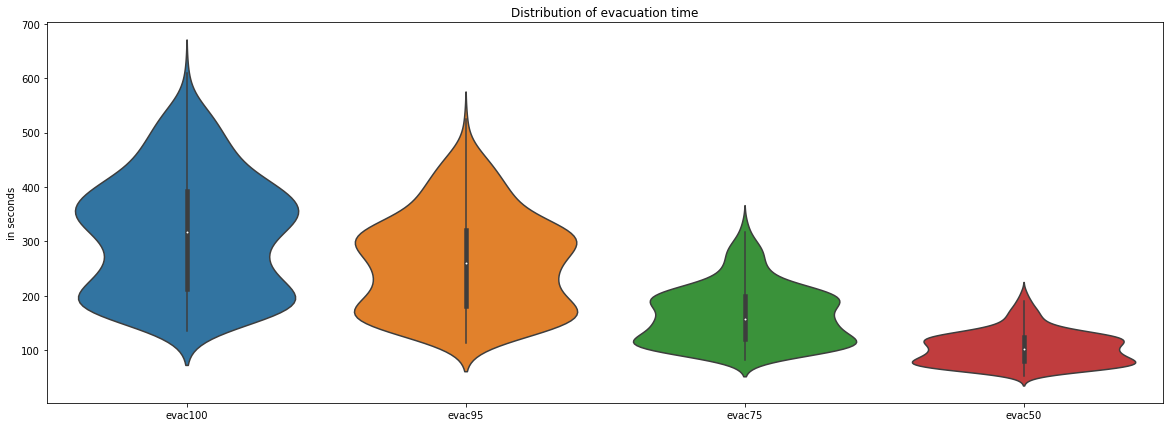

In [5]:
plt.figure(figsize=(20,7))
plt.title("Distribution of evacuation time")
plt.ylabel("in seconds")
ax = sns.violinplot(data=df_base.loc[:, ["evac100","evac95","evac75","evac50"]], scale='count')
plt.show()

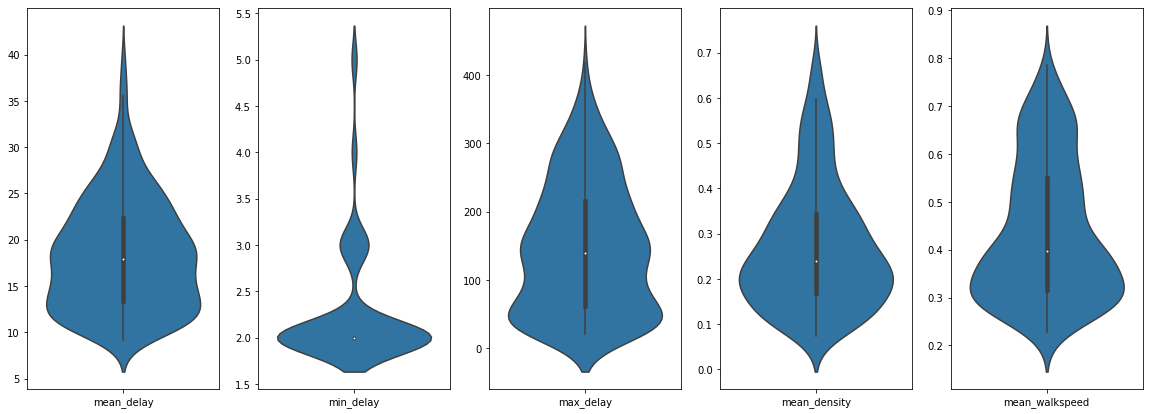

In [6]:
fig, axs = plt.subplots(1, 5, figsize=(20, 7), sharey=False)
#plt.title("Distribution of evacuation time")
#plt.ylabel("in seconds")
sns.violinplot(ax = axs[0], data=df_base.loc[:, ["mean_delay"]], scale='count')
sns.violinplot(ax = axs[1], data=df_base.loc[:, ["min_delay"]], scale='count')
sns.violinplot(ax = axs[2], data=df_base.loc[:, ["max_delay"]], scale='count')
sns.violinplot(ax = axs[3], data=df_base.loc[:, ["mean_density"]], scale='count')
sns.violinplot(ax = axs[4], data=df_base.loc[:, ["mean_walkspeed"]], scale='count')

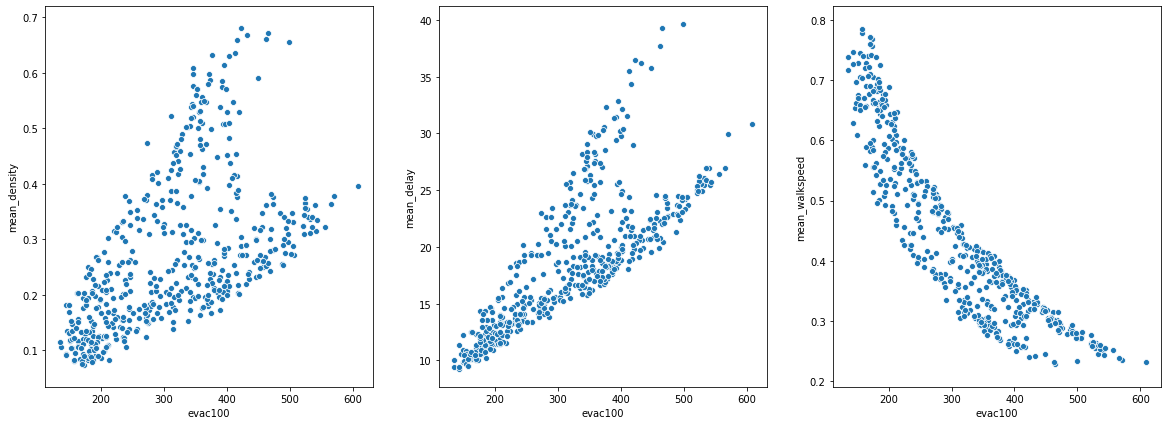

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7), sharey=False)
sns.scatterplot(ax = axs[0], data=df_base, x="evac100", y="mean_density")
sns.scatterplot(ax = axs[1], data=df_base, x="evac100", y="mean_delay")
sns.scatterplot(ax = axs[2], data=df_base, x="evac100", y="mean_walkspeed")

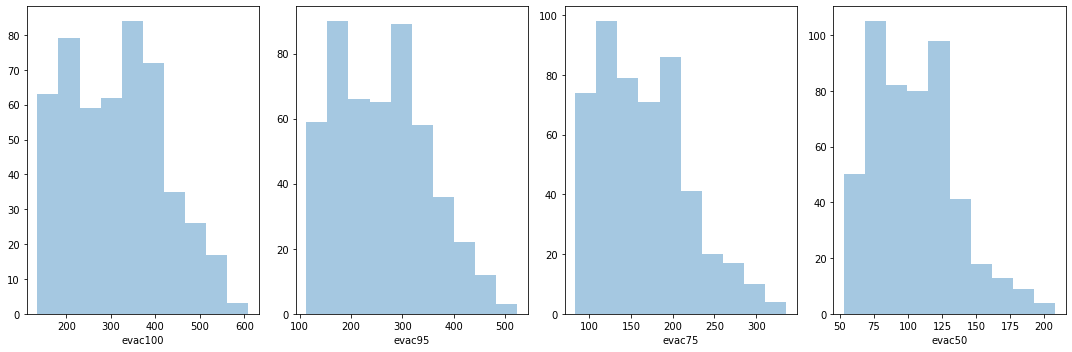

In [8]:
f, axes = plt.subplots(1, 4, figsize=(15,5))

sns.distplot(df_base["evac100"], bins=10, kde=False, ax=axes[0])
sns.distplot(df_base["evac95"], kde=False, bins=10, ax=axes[1])
sns.distplot(df_base["evac75"], bins=10, kde=False, ax=axes[2])
sns.distplot(df_base["evac50"], bins=10, kde=False, ax=axes[3])
plt.tight_layout()
plt.show()

In [9]:
df_base.nlargest(20, 'evac100')[["familiarity","population","evac100"]]

,familiarity,population,evac100
305,0.030770,2179.0,609.0
34,0.012793,2070.0,571.0
377,0.118926,2171.0,566.0
51,0.037646,1998.0,556.0
286,0.141208,2042.0,544.0
223,0.020163,2017.0,542.0
152,0.105118,2079.0,540.0
213,0.051144,1978.0,536.0
285,0.115279,1945.0,536.0
26,0.057388,2085.0,532.0


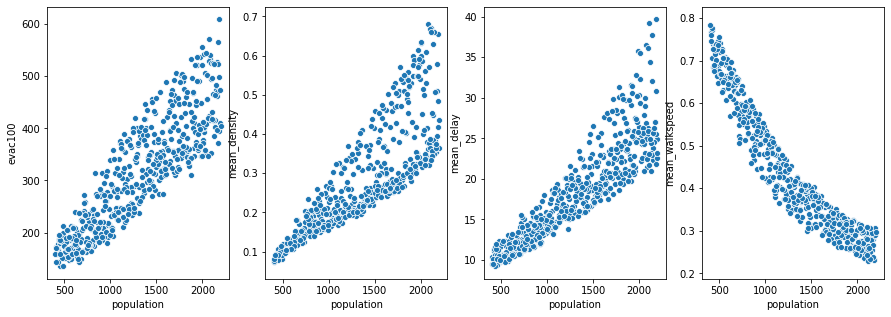

In [10]:
f, axs = plt.subplots(1, 4, figsize=(15,5), sharey=False)
sns.scatterplot(ax=axs[0], x="population", y="evac100", data=df_base)
sns.scatterplot(ax=axs[1], x="population", y="mean_density", data=df_base)
sns.scatterplot(ax=axs[2], x="population", y="mean_delay", data=df_base)
sns.scatterplot(ax=axs[3], x="population", y="mean_walkspeed", data=df_base)

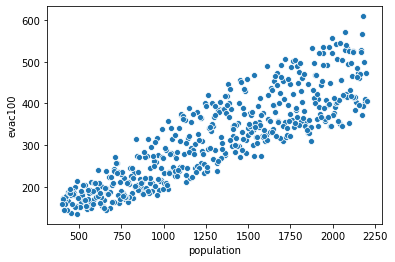

In [12]:
sns.scatterplot(x="population", y="evac100", data=df_base)

In [13]:
df_base["size"] = df_base["population"]
df_base["size"] = pd.to_numeric(df_base["size"])

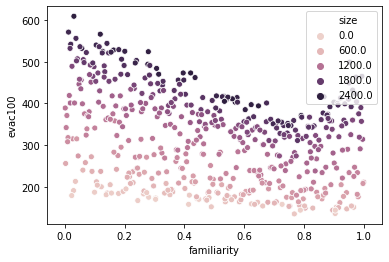

In [14]:
sns.scatterplot(data=df_base, x="familiarity", y="evac100", hue="size")

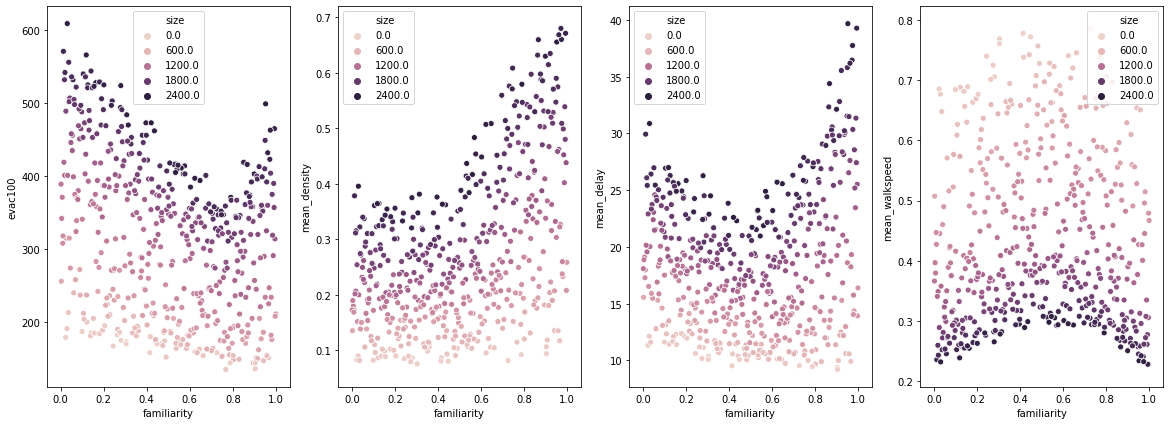

In [15]:
fig, axs = plt.subplots(1, 4, figsize=(20, 7), sharey=False)
sns.scatterplot(ax = axs[0], data=df_base, x="familiarity", y="evac100", hue="size")
sns.scatterplot(ax = axs[1], data=df_base, x="familiarity", y="mean_density", hue="size")
sns.scatterplot(ax = axs[2], data=df_base, x="familiarity", y="mean_delay", hue="size")
sns.scatterplot(ax = axs[3], data=df_base, x="familiarity", y="mean_walkspeed", hue="size")

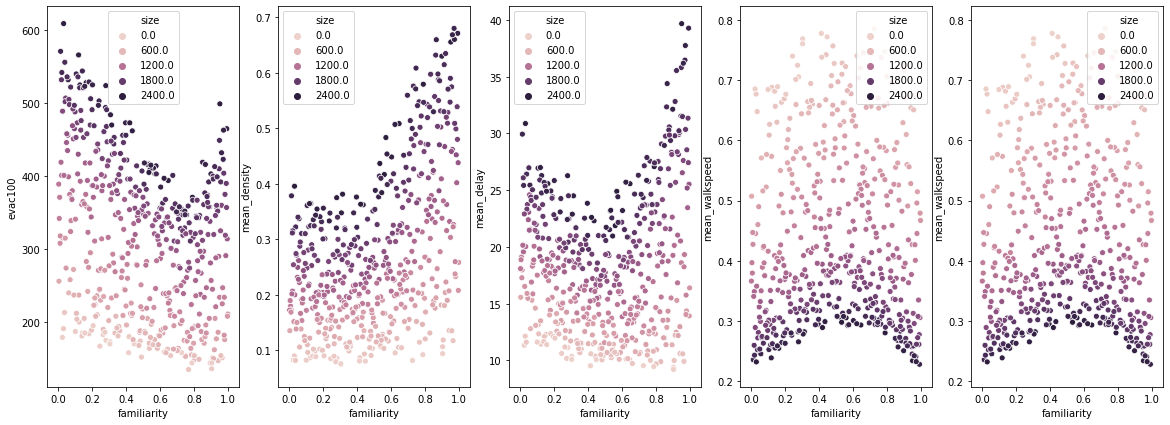

In [16]:
fig, axs = plt.subplots(1, 5, figsize=(20, 7), sharey=False)
sns.scatterplot(ax = axs[0], data=df_base, x="familiarity", y="evac100", hue="size")
sns.scatterplot(ax = axs[1], data=df_base, x="familiarity", y="mean_density", hue="size")
sns.scatterplot(ax = axs[2], data=df_base, x="familiarity", y="mean_delay", hue="size")
sns.scatterplot(ax = axs[3], data=df_base, x="familiarity", y="mean_walkspeed", hue="size")
sns.scatterplot(ax = axs[4], data=df_base, x="familiarity", y="mean_walkspeed", hue="size")

[MainProcess/INFO] 500 points remaining, containing 100 cases of interest
[MainProcess/INFO] mean: 0.6590909090909091, mass: 0.176, coverage: 0.58, density: 0.6590909090909091 restricted_dimensions: 1


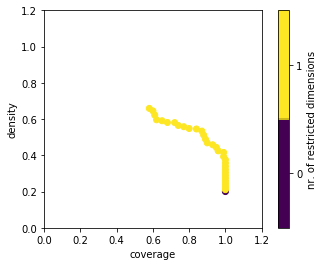

In [21]:
from ema_workbench.analysis import prim
ema_logging.log_to_stderr(ema_logging.INFO)

# Select the uncertainty values
cleaned_experiments = df_base.iloc[:,:2]

# Calculate the value (threshold) where the upper 33.3% range starts
percentile_evac100 = np.percentile(df_base["evac100"], 80)

# Bool the values if they are larger than the threshold
df_base["evac_bool"] = df_base["evac100"] > percentile_evac100

# If cost and deaths and variance arein the 66th upper percentiles indicate true
y = df_base["evac_bool"] 
# & combined["Death_bool"] & combined["Var_bool"]

# Execute prim algorithm
prim_alg = prim.Prim(cleaned_experiments, y, threshold=0.83)
box1 = prim_alg.find_box()

# Show trade off plot
box1.show_tradeoff()
plt.show()

In [22]:
# Choosing the best box and inspecting the corresponding coverage, density and uncertainty ranges.
box1.inspect(33, style='graph')
box1.select(33)
plt.show()

IndexError: single positional indexer is out-of-bounds